### Autoren:

Ekaterina Kasina

Fabian Flach

Jonas Goltz

In [1]:
from IPython.display import Latex
import matplotlib.pyplot as plt
import pandas as pd
#import vpython
from pylab import polyfit
import numpy as np

# 1. Experimentelle Daten
(a) Führen Sie das Phyphox-Fahrstuhl-Experiment durch und stellen Sie die Daten für Ort, Geschwindigkeit und Beschleunigung als Funktion der Zeit mit matplotlib graphisch dar.
Mit welchen Funktionen können die Daten beschrieben werden? Simulieren Sie die Bewegung mit vpython oder pyplay.

In [2]:
def acc(x):
    t1 = 7.75
    t2 = 8.9
    t3 = 10
    t4 = 30.5
    t5 = 31.5
    t6 = 32.5
    amp_n = 0.85
    amp_p = 0.85
    default = 0.05
    
    if x < t1: #flat
        return 0 + default
    if x < t2: #down
        return -(x-t1)*amp_n/(t2-t1) + default
    if x < t3: #up
        return (x-t2)*amp_n/(t3-t2)-amp_n + default
    if x < t4: #flat
        return 0 + default
    if x < t5: #up
        return (x-t4)*amp_p/(t5-t4) + default
    if x < t6: #down
        return -(x-t5)*amp_p/(t6-t5)+amp_p + default
    return 0 + default #flat

def vel(x):
    x = x//1
    if x <= 6:
        return 0
    if x <= 12:
        return -(x-6)/6
    if x <= 29:
        return -1
    if x <= 35:
        return (x-29)/6-1
    return 0

def height(x):
    x = x//1
    lower = 9
    upper = 32
    if x <= lower:
        return 0
    if x <= upper:
        return -(x-lower)*21.8/(upper - lower)
    return -21.8


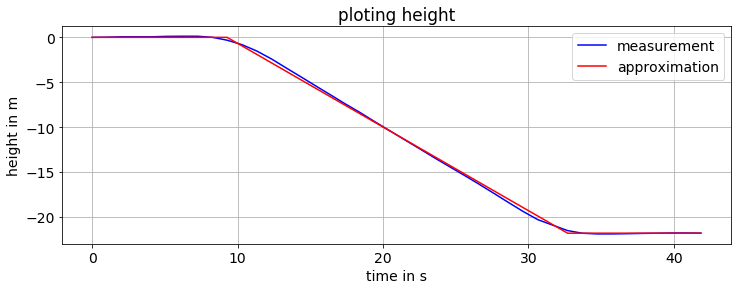

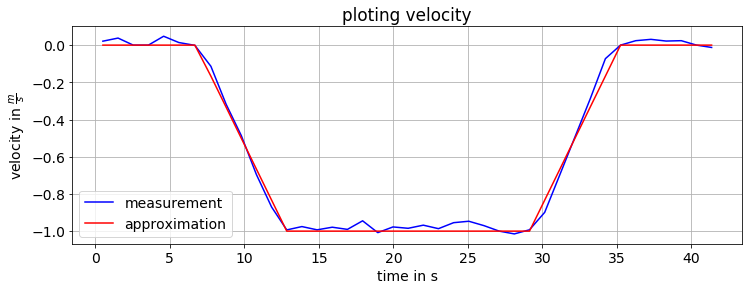

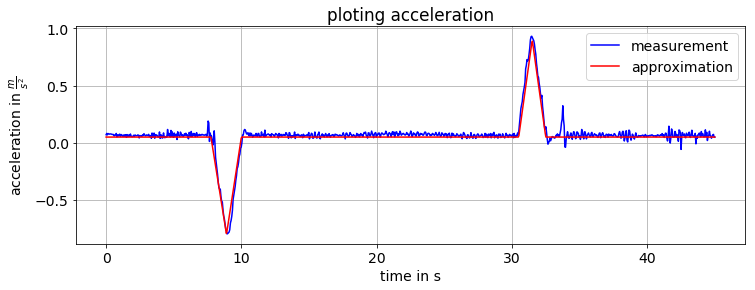

In [3]:
pv_dat = pd.read_csv('Pressure and velocity.csv', delimiter = ',')
pv_dat = pv_dat.drop(pv_dat.index[31])
pv_dat



plt.rcParams.update({'font.size': 14})


plt.figure(figsize=(12,4))
plt.plot(pv_dat['Time (s)'],pv_dat['Height (m)'],color = 'blue')
plt.plot(pv_dat['Time (s)'],[height(x) for x in pv_dat['Time (s)']],color = 'red')
plt.title('ploting height')
plt.xlabel('time in s')
plt.ylabel('height in m')
plt.legend(['measurement','approximation'])
plt.grid(True)
plt.show()

plt.figure(figsize=(12,4))
plt.plot(pv_dat['Time (velocity) (s)'],pv_dat['Velocity (m/s)'],color = 'blue')
plt.plot(pv_dat['Time (velocity) (s)'],[vel(x) for x in pv_dat['Time (velocity) (s)']],color = 'red')
plt.title('ploting velocity')
plt.xlabel('time in s')
plt.ylabel(r'velocity in $\frac{m}{s}$')
plt.legend(['measurement','approximation'])
plt.grid(True)
plt.show()

acc_dat = pd.read_csv('Acceleration.csv', delimiter = ',', names =['time','acc'],header = 0)
plt.figure(figsize=(12,4))
plt.plot(acc_dat['time'],acc_dat['acc'],color = 'blue')
plt.plot(acc_dat['time'],[acc(x) for x in acc_dat['time']],color = 'red')
plt.title('ploting acceleration')
plt.xlabel('time in s')
plt.ylabel(r'acceleration in $\frac{m}{s^2}$')
plt.legend(['measurement','approximation'])
plt.grid(True)
plt.show()

Die Plots zeigen in blau unsere Messungen in in rot unsere Näherungen zu den Messungen. Der erste Plot zeigt die Höhe in Metern gegen die Zeit, der zweite die Geschwindigkeit in Metern pro Sekunde $\frac{m}{s}$ gegen die Zeit und der dritte die Beschleunigung in $\frac{m}{s^2}$ gegen die Zeit.

Beim Plot der Beschleunigung fällt auf, dass bei der Messung der ein geringer offset vorliegt. Die "Nulllinie" liegt bei etwa $0.1$ anstatt $0$. Dies ist auf eine Fehler im Messgerät zurück zu führen. Der der Animationunseres Aufzugs muss dies berücksichtigt werden, da der Aufzug sonst eine konstante zusätzliche Beschleunigung erfährt und damit deutlich weiter fährt als gewünscht. Aus diesem Grund muss der offset für die Animation herausgenommen werden.

(b) Welches Polynom beschreibt am besten die Daten Unbekannt.txt. Verwenden Sie
pylab.polyfit.

In [4]:
"""
evaluates a polynome given by the constants at a given x value
-----
constants: cantstants of the polnome starting with the highest order
x : x values it hast to be evaluated at
"""
def poly(constants, x):
    result = 0
    for i,c in enumerate(np.flip(np.array(constants), axis = 0)):
        result += c*x**i
    return result

In [5]:
unb = pd.read_csv('data/UnbekannteDaten.txt', usecols = [0,1], names = ['y','x'],
                  delimiter = ' ',  header = 0)
unb.head()

,y,x
0,301.826720,-10
1,206.480686,-9
2,141.350691,-8
3,181.451884,-7
4,41.781275,-6


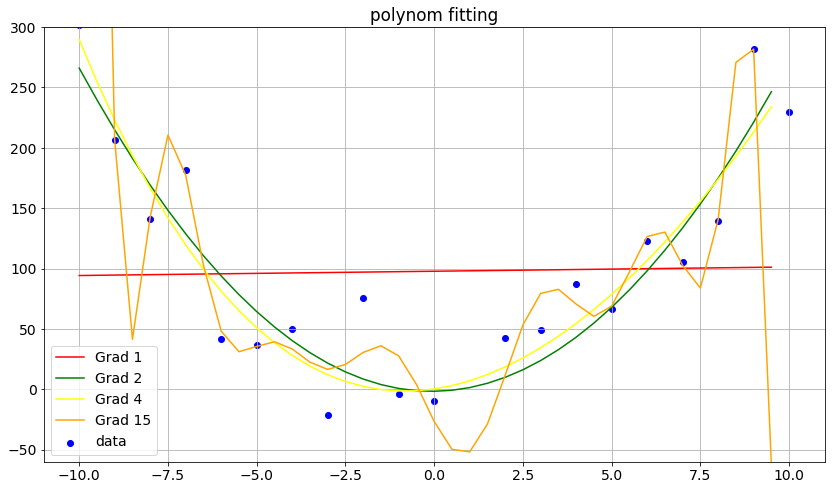

In [6]:
x_val = [i for i in np.arange(-10,10,0.5)]
color_map = ['red','green','yellow','orange']
plt.figure(figsize=(14,8))

# plotting different degrees (up to four simultaneously)
plt.scatter(unb.x,unb.y, color = 'blue')
for i,deg in enumerate([1,2,4,15]):
    plt.ylim([-60,300])
    plt.plot(x_val, [poly(polyfit(unb.x, unb.y,deg),x) for x in x_val],color = color_map[i])
plt.legend(['Grad 1','Grad 2','Grad 4','Grad 15','data'])
plt.grid(True)
plt.title('polynom fitting')
plt.show()

Der Plot zeigt die original Daten als blaue Punkte und verschiedene Regressionskurven.

Man kann gut erkennen, dass ein Polynom ersten Grades in nicht ausreicht um eine halbwegs saubere Näherung für die Daten zu Beschreiben. Bei den Graden 2 und 4 kann man dagegen kaum einen Unterschied an den Kurven erkennen, die beide die Daten halbwegs gut annähern.
Beim Polynom mit Grad 15 kann man dagegen deutliches over fitting sehen, da die Funktion zwar einen geringeren quadratiscchen Fehler aufweist als die Polynomes des Grads 2 und 4, aber stark schwingendes Verhalten zeigt.

Grundsätzlich sollte man versuchen den Grad so gering und die Funktion so einfach wie Möglich zu halten, ein Konzept das auch als "Occam's razor" bekannt ist. ("So einfach wie möglich so komplex wie nötig")

Aus diesem Grund sollte man für die Daten ein Polynom 2. Grades wählen, da der Gewinn durch einen höheren Grad marginal ist.

Bei echten Daten sollte man ein Test-Set beiseite legen, das nicht für das fitten der Polynome verwendet wird. Mögliche Polynome sollten auf diesen Testdaten evaluiert werden um eine Abschätzung zu erhalten wie gut das Modell generalisiert.

(c) Es werden verschiedene Massen an eine vertikale Feder gehängt und die Federlängen
bestimmt. Die Daten befinden sich im File DatenFeder.txt. Fuhren Sie eine lineare Regression mit pylab.polyfit durch und bestimmen Sie die Federkonstanten fur eine lineare (F = Dx) und eine kubische Funktion (F = D1x + D2x2 + D3x3).

In [7]:
spring_data = pd.read_csv('data/DatenFeder.txt', usecols = [0,1], names = ['distance','mass'],
                  delimiter = ' ',  header = 0)
spring_data.head()

,distance,mass
0,0.0865,0.10
1,0.1015,0.15
2,0.1106,0.20
3,0.1279,0.25
4,0.1892,0.30


In [8]:
print("Federkonstanten linear:",polyfit(spring_data.mass, spring_data.distance,1),
      "\nFederkonstanten kubisch:",polyfit(spring_data.mass, spring_data.distance,3))

Federkonstanten linear: [0.45549825 0.0656286 ] 
Federkonstanten kubisch: [-1.0552053   1.20499853  0.22952379  0.04116904]


(d) Ein kleiner Ball wird mit einer bestimmten Anfangsgeschwindigkeit unter einem bestimmten Abwurfwinkel geworfen und die x- und y-Position zu verschiedenen Zeitpunkten mit
einer Videoanalyse gemessen (DatenSchWurf.txt). Fuhren Sie eine lineare Regression mit pylab.polyfit durch. Schätzen Sie die Flugzeit und Geschwindigkeit des Balles ab.

In [9]:
throw_data = pd.read_csv('data/DatenSchWurf.txt', usecols = [i for i in range(5)], 
                names = ['distance','height1','height2','height3','height4'], delimiter = ' ',  header = 0)
throw_data.head()

,distance,height1,height2,height3,height4
0,30,0.00,0.00,0.00,0.00
1,29,2.25,3.25,4.50,6.50
2,28,5.25,6.50,6.50,8.75
3,27,7.50,7.75,8.25,9.25
4,26,8.75,9.25,9.50,10.50


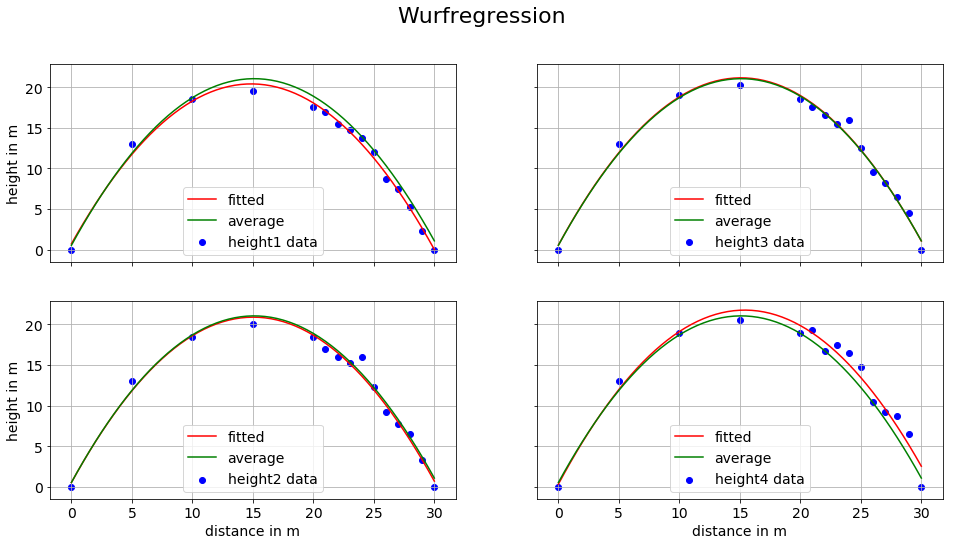

In [10]:
color_map = ['blue','red','green','orange']
experiment = ['height1','height2','height3','height4']
x_val = [i for i in np.arange(0,30.5,0.5)]
constants = []
for e in experiment:
    constants += [polyfit(throw_data.distance, throw_data[e],2)]
constants = np.array(constants)
av = np.sum(constants, axis = 0)/len(constants)

#print('average speed:',av[1],'m/s')#is that really the average speed?
fig, ax = plt.subplots(2,2,figsize = (16,8), sharex = True, sharey= True)
#fig.tight_layout()
for i,z in enumerate(zip(experiment,constants)):
    if i//2 == 0:
        ax[i%2,i//2].set_ylabel('height in m')
    if i%2 == 1:
        ax[i%2,i//2].set_xlabel('distance in m')
    ax[i%2,i//2].plot(x_val, [poly(z[1],x) for x in x_val],color = 'red')
    ax[i%2,i//2].plot(x_val, [poly(av,x) for x in x_val],color = 'green')
    ax[i%2,i//2].scatter(throw_data.distance, throw_data[z[0]], color = 'blue')
    ax[i%2,i//2].legend(['fitted','average',str(z[0])+" data"])
    ax[i%2,i//2].grid(True)
plt.suptitle('Wurfregression', fontsize=22)
plt.show()

Die 4 Plots zeigen die unterschiedlichen Messungen der Daten für das selbe Experiment. Die blauen Punkte sind die Messpunkte der einzelnen Würfe, die rote Kurve Zeigt die quadratische Regression auf die Messpunkte und die grüne Kurve zeigt die Regression auf die durchschnittlichen Werte.

In [11]:
d = 0.1
theta = np.arctan((poly(av,d)-poly(av,0))/d)
t = np.sqrt((60*np.tan(theta)-40)/9.81)
v = 30/(np.cos(theta)*t)
print('Berechnette Werte für die Flugdauer und Abwurfgeschwindigkeit:')
print('Flugdauer:',t,'s\nAbwurfgeschwindigkeit:',v,'m/s')

Berechnette Werte für die Flugdauer und Abwurfgeschwindigkeit:
Flugdauer: 3.533991473567013 s
Abwurfgeschwindigkeit: 24.51053384190833 m/s


### Aufgabe 2 - Wurfbewegungen

### a)
Ein Objekt wird von $x = x_{0}$ mit einer Anfangsgeschwindigkeit $v_{0}$ und einem Anfangswinkel $\theta_{0}$ abgeworfen. Die Reibung kann vernachlässigt werden. Die einzige Kraft ist die Gravitationskraft in y-Richtung.

* ***i)*** 
 1. Lösen Sie die Differentialgleichungen  $\ddot{x}$ $= 0$ und $\ddot{y}$ $= -g$ numerisch und vergleichen Sie das Eregbnis mit der analytischen Lösung. 
 2. Berechnen Sie die Wurfweite als Funktion des Abwurfwinkels.

***Bewegung in x-Richtung:***

* Numerische Lösung:
\begin{align}\\
\ddot{x} &= 0\\
\\
\dot{x} &= v_{x}(t)\\ &= v * cos(\theta)\\ &= \frac{\Delta x}{\Delta t}\\
\\
\Delta x &= v_{x} * \Delta t\\
\\
\\
\end{align}

* Analytische Lösung:
\begin{align}
x(t) &= v_{x} * t\\ &= v*cos(\theta) * t
\\
\\
\end{align}

* Vergleich: 
<center>Beide Lösungen sind identisch.</center>


***Bewegung in y-Richtung:***

* Numerische Lösung:

\begin{align}\\
\ddot{y} &= -g\\
\\
\ddot{y} &= \frac{\Delta v_{y}}{\Delta t}\\
\\
\dot{y} &= v_{y}(t)\\ &= v * sin(\theta)\\ 
\\
\Delta v_{y} &= -g * \Delta t\\ 
\\
v_{y}(t) + \Delta v_{y} &= \frac{\Delta y}{\Delta t}\\
\\
\Delta y &= v_{y} * \Delta t + \Delta v_{y} \Delta t\\ &= v_{y} * \Delta t - g * \Delta t * \Delta t \\
&= v_{y} * \Delta t - g * \Delta t^2 \\ &= v * sin(\theta) * \Delta t - g * \Delta t^2
\\
\\
\end{align}

* Analytische Lösung:
\begin{align}\\
y(t) &= v_{y}*t-\frac{1}{2}*g*t^2 \\ &= v*sin(\theta)*t-\frac{1}{2}*g*t^2
\\
\\
\end{align}


* Vergleich:
<center>Die numerische Lösung unterscheidet sich im negativen Term um den Faktor 1/2. Dies ist die Ungenauigkeit der numerischen Lösung.</center>

***Algorithmus:***

$y_{n} = (v * sin(\theta)*\Delta t - g*\Delta t^2) + y_{n-1}$

($x_{1} = v_{x}*\Delta t + x_{0}$)

($x_{1} = v_{x}*\Delta t$ Wurfweite in Meter)

while $y \geq \ $0

$x_{n} = v * cos(\theta)*\Delta t + x_{n-1}$


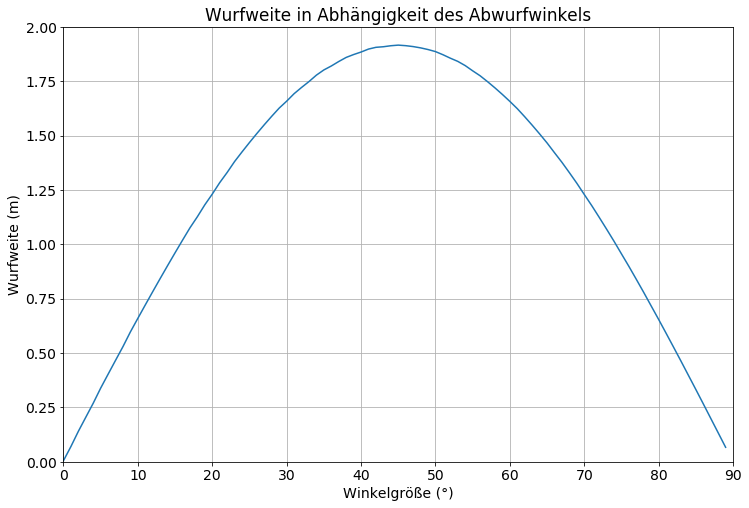

In [12]:
import math
# Geschwindigkeit m/s:
v = 5

# Schrittweite in s:
t = 0.001

# Gravitationskonstante m/s^2:
g = 9.81

# Abwurfwinkel in Grad:
w = range(0,90)



def wurfweite(v_, t_, g_):
    # Wurfweite:
    weite = []

    # Wurfhöhe:
    hoehe = []
    
    for winkel in w:
        
        x_n = 0
        y_n = 0
        t = t_
        
        y_n = (v_ * math.sin(winkel*math.pi/180) * t - g_ * t * t) + y_n
        
        while y_n >= 0:
            x_n = v_ * math.cos(winkel*math.pi/180) * t + x_n        
            y_n = (v_ * math.sin(winkel*math.pi/180) * t - g_ * t * t) + y_n
            t += t_
        
        wurfweite_m = v_*math.cos(winkel*math.pi/180)*t  
        wurfhoehe_m = (v_*math.sin(winkel*math.pi/180))**2/(2*g_)
        weite.append(wurfweite_m)
        hoehe.append(wurfhoehe_m)
    return weite, hoehe
    #print(hoehe)
    
weite, hoehe = wurfweite(v,t,g)
plt.figure(figsize=(12,8))
plt.xlabel('Winkelgröße (°)')
plt.ylabel('Wurfweite (m)')
plt.title('Wurfweite in Abhängigkeit des Abwurfwinkels')
plt.grid(True)
plt.xlim(0,90)
plt.ylim(0,2)
plt.plot(w, weite)
plt.show()

* ***ii)*** 
 1. Formulieren Sie die Aufgabe als Randwertproblem für einen senkrechten Wurf $\theta = \frac{\pi}{2}$
 2. Bestimmen Sie die Anfangsgeschwindigkeit bei vorgegebener Wurfhöhe mit Hilfer einer binären Suche.


velocity: 14.00390625 
height: 9.991668749506328


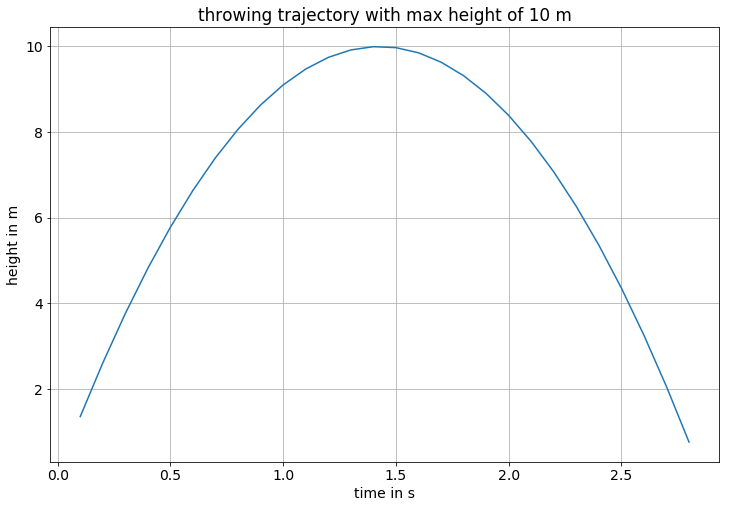

In [13]:
import scipy.integrate as si
import math

g = 9.81
tol = 0.01
target_height = 10

def ODEfreierFall(y, t):
    return np.array([y[2],y[3],0,-g])
    #return np.array([y,y,0,-g])

def wrapper(_v, t_max = 10):
    _y0 = np.array([0,0,0,_v])
    _t = np.arange(0,t_max,0.1)
    _L = si.odeint(func = ODEfreierFall, y0 = _y0, t = _t)
    return _L, np.max(_L[:,1])

t_max = 5
h = 0
v0 = 0
v1 = 10

while h < target_height:
    L,h = wrapper(v1)
    if h < target_height:
        v0 = v1
        v1 *= 2

error = abs(h - target_height)
while error > tol:
    v_tmp = v0 + (v1-v0)/2
    L,h = wrapper(v_tmp,t_max)
    if h > target_height:
        v1 = v_tmp
    else:
        v0 = v_tmp
    error = abs(h - target_height)
print("velocity:",v0,"\nheight:",h)
t = np.arange(0,t_max,0.1)[L[:,1]>0]
L = L[L[:,1]>0]
plt.figure(figsize=(12,8))
plt.plot(t, L[:,1])
plt.ylabel('height in m')
plt.xlabel('time in s')
plt.title('throwing trajectory with max height of '+str(target_height)+ ' m')
plt.grid(True)
plt.show()

Der Plot zeigt die Wurfbahn für einen senkrechten Wurf der genau die Höhe von $10m\pm 0.01m$ erreicht.

Für die Ermittlung der nötigen Abwurfgeschwindigkeit in y-Richtung verwenden wir dafür einen binären Suchalgorithmus.

Als erstes ermittel wir zwei Werte für $v$ ($v_0,v_1$), so dass $v_0$ unter der gewüsnchten Wurfhöhe und $v_1$ oberhalb liegt. Dafür beginnen wir mit einem default werden von $v_0 = 0, v_1 = 10$ und verdoppeln $v_1$ solange bis die die Zielhöhe überschritten wurde. Dabei wird $v_0$ immer auf den alten $v_1$ Wert gesetzt, damit das Suchintervall möglichst klein gehalten werden kann.

Anschließend nehmen wir $v_m$ als die Mitte des resultierenden Intervalls und prüfen die Höhe des resultierenden Wurfes. Liegt sie über dem Zielwert, so setzen wir $v_1 = v_m$ anderenfalls $v_0 = v_m$. Diesen Vorgang wiederholen wir so lange bis die Differenz aus tatsächlichem wert und Zielwert die Gewünschte Tolleranz unterschreitet.

### b)

Ein kugelförmiges Objekt wird von einem Punkt $x_{0}$ unter einem Winkel $\theta_{0}$ abgeworfen. Es wirkt eine Reibungskraft entgegen der Bewegungsrichtung mit dem Betrag:

\begin{align}\\
F_{R} = 0.5 \pi R^2 \rho C v^2
\end{align}

<center>($R$: Radius der Kugel, $\rho$: Dichte der Luft, $v$: Geschwindigkeit der Kugel, $C = 0.5$)<center>

* ***i)*** Zeigen Sie, dass das Problem mit den folgenden Bewegungsgleichungen beschrieben werden kann.

\begin{align}
\ddot{x}&=-\frac{0.5\pi R^2C\rho}{m}\dot{x}\sqrt{\dot{x}^2+\dot{y}^2}\\
\ddot{y}&=-g-\frac{0.5\pi R^2C\rho}{m}\dot{y}\sqrt{\dot{x}^2+\dot{y}^2}\\\\\\
&\underline{Beweis:}\\\\
F &= -F_{R}\\
|v|&=\sqrt{v_{x}^2+v_{y}^2}\\
v_{x}^2 &= \dot{x}^2\\
v_{y}^2 &= \dot{y}^2\\
m\ddot{y}&=-mg\\\\
F_{x} &= ma_{x} = m\ddot{x}\\
F_{R_{x}} &= 0.5 \pi R^2 \rho C\dot{x}|v|\\
F_{x} &= -F_{R_{x}}\\
m\ddot{x} &= -0.5\pi R^2\rho C\dot{x}|v| &\Rightarrow \ddot{x} &= -\frac{0.5\pi R^2\rho C}{m} \dot{x}\sqrt{\dot{x}^2+\dot{y}^2}\\\\
F_{y} &= ma_{y} = m\ddot{y}\\
F_{R_{y}} &= 0.5 \pi R^2 \rho C\dot{y}|v|\\
F_{y} &= -F_{R_{y}}-mg\\
m\ddot{y} &= -0.5\pi R^2\rho C\dot{y}|v|-mg &\Rightarrow \ddot{y} &= -\frac{0.5\pi R^2\rho C}{m} \dot{y}\sqrt{\dot{x}^2+\dot{y}^2}-g\\\\
\end{align}

* ***ii)*** 
Führen Sie die $beiden$ Differentialgleichungen 2. Ordnung in ein System von $vier$ Differentialgleichungen 1. Ordnung über und visualisieren Sie die Wurftrajektorie.

<center>$Differentialgleichungen\>\underline{2.\>Ordnung:}$<center>
\begin{align}\\\\
\ddot{x}&=-\frac{0.5\pi R^2C\rho}{m}\dot{x}\sqrt{\dot{x}^2+\dot{y}^2}\\
\ddot{y}&=-g-\frac{0.5\pi R^2C\rho}{m}\dot{y}\sqrt{\dot{x}^2+\dot{y}^2}\\\\\\
\end{align}
<center>$Differentialgleichungen\>\underline{1.\>Ordnung:}$<center>
\begin{align}\\\\
\dot{x}&= v_x\\
\dot{y}&=v_y\\
\dot{v_x}&=-\frac{0.5\pi R^2C\rho}{m}v_x\sqrt{v_x^2+v_y^2}\\
\dot{v_y}&=-\frac{0.5\pi R^2C\rho}{m}v_y\sqrt{v_x^2+v_y^2}-g\\
\end{align}

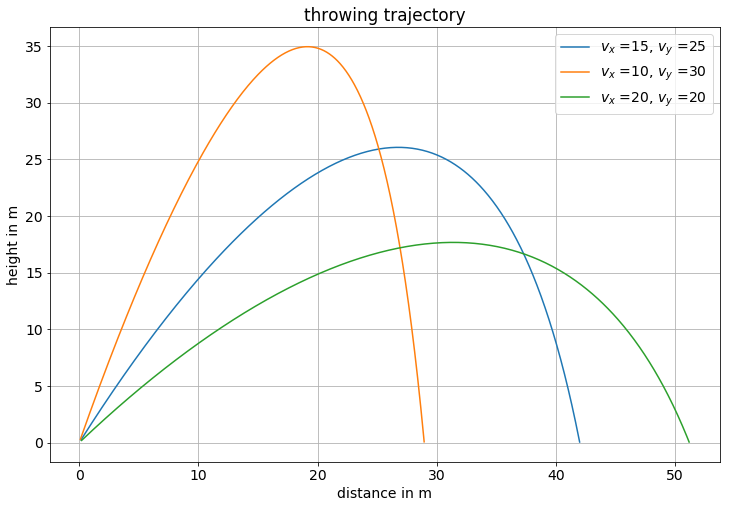

In [14]:
# Visualisierung der Wurftrajektorie:
R = 0.1 
rho = 1.292
m = 1
K = -(0.5 * math.pi * R**2 * 0.5 * rho)/m

def theMagicFunction(y,t):
    v = np.linalg.norm(y[:2])
    a_x = K * y[2]*v
    a_y = K * y[3]*v -g
    return np.array([y[2],y[3],a_x,a_y])

plt.figure(figsize=(12,8))
leg = []
for _y0 in np.array([[0,0,15,25],[0,0,10,30],[0,0,20,20]]):
    #_y0 = np.array([0,0,15,25])
    _t = np.arange(0,20,0.01)
    L = si.odeint(func = theMagicFunction, y0 = _y0, t = _t)
    L = L[L[:,1] > 0]
    plt.plot(L[:,0],L[:,1])
    leg += [r'$v_x$ ='+str(_y0[2])+', $v_y$ ='+str(_y0[3])]
plt.legend(leg)
plt.xlabel('distance in m')
plt.ylabel('height in m')
plt.title('throwing trajectory')
plt.grid(True)
plt.show()

Der Plot zeigt einen schrägen Wurf mit Luftwiderstand. Man kann schön erkennen wie die Kurve sich wie erwartet nach rechts lehnt.

Dies liegt daran, dass die Geschwindigkeit in x-Richtung durch den Luftwiederstand gebremst wird, während der Ball nur in y-Richtung beschleunigt wird. Dieser Effekt wird umso stärker je länger man die Kugel fallen lässt, bis sie schlussendlich in einen freien Fall übergeht.

Das liegt daran, dass der Luftwiderstand proportional ist zum Betrag der Geschwindigkeit. Diese nimmt nach Erreichen des Höhepunkts in y-Richtung immer weiter zu. Gleichzeitig bremst der Luftwiderstand aber beide Komponenten von $v$, während die Bescheunigung nur in $v_y$ wirkt.

* ***iii)*** Untersuchen Sie die Wurfweite als Funktion der Masse und des Abwurfwinkels.

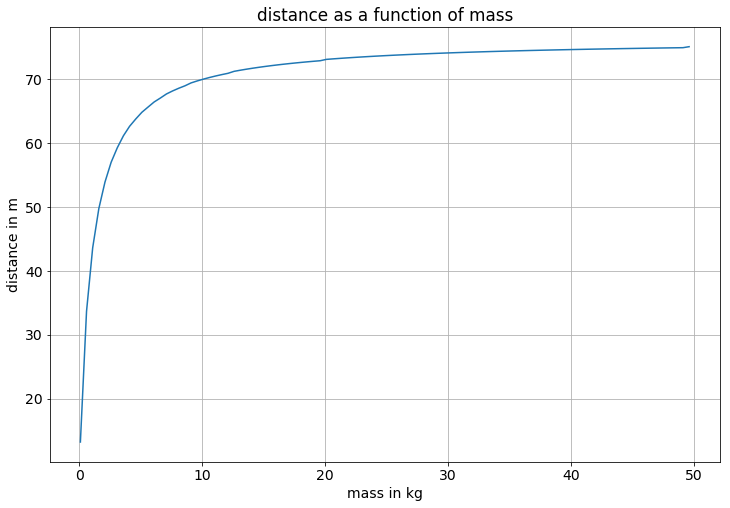

In [15]:
# Wurfweite als Funktion der Masse:
def magic2(magic_mass):
    R = 0.1 
    rho = 1.292
    K = -(0.5 * math.pi * R**2 * 0.5 * rho)/magic_mass

    def theMagicFunction(y,t):
        v = np.linalg.norm(y[:2])
        a_x = K * y[2]*v
        a_y = K * y[3]*v -g
        return np.array([y[2],y[3],a_x,a_y])

    _y0 = np.array([0,0,15,25])
    #_t = np.arange(0,20,0.01)
    L = si.odeint(func = theMagicFunction, y0 = _y0, t = _t)
    return L[L[:,1] > 0][-1,0]

mass = np.arange(0.1,50,0.5)
plt.figure(figsize=(12,8))
plt.plot(mass,np.array([magic2(m) for m in mass]))
plt.title('distance as a function of mass')
plt.xlabel('mass in kg')
plt.ylabel('distance in m')
plt.grid(True)
plt.show()

Der Plot zeigt die Wurfweite abhängig von der Masse bei Luftwiderstand. Wie erwartet steigt die Kurve zuerst steil an um sich dann tangential dem Wert anzunähern der die maximale Wurfweite ohne Luftwiderstand ist. Das liegt daran, dass der Schrägenwurf ohne Luftreibung unabhängig von der Masse ist, und der Luftwiderstand mit $\frac{1}{m}$ indirekt proportional zur Masse ist.

max height of 20.24 is reached at theta = 0.77


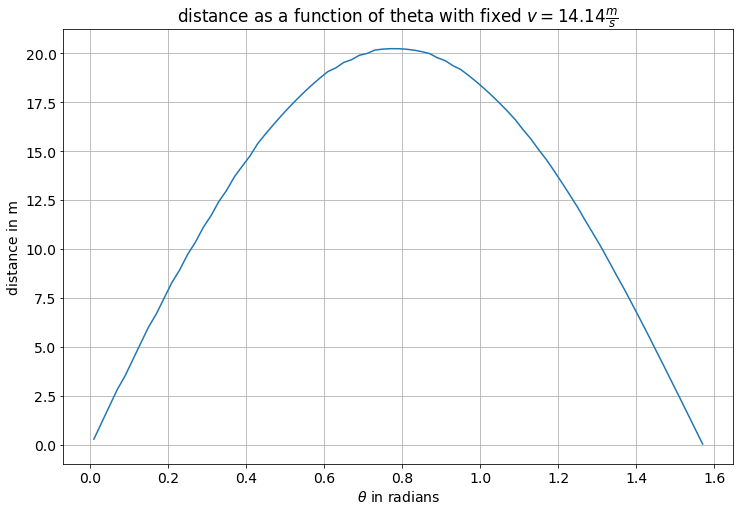

In [16]:
# Wurfweite als Funktion des Abwurfwinkels:
def magic3(_theta, _v, _mass = 50):
    magic_mass = _mass
    R = 0.1 
    rho = 1.292
    K = -(0.5 * math.pi * R**2 * 0.5 * rho)/magic_mass

    def theMagicFunction(y,t):
        v = np.linalg.norm(y[:2])
        a_x = K * y[2]*_v
        a_y = K * y[3]*_v -g
        return np.array([y[2],y[3],a_x,a_y])

    _y0 = np.array([0,0,math.cos(_theta)*_v,math.sin(_theta)*_v])
    _t = np.arange(0,20,0.01)
    L = si.odeint(func = theMagicFunction, y0 = _y0, t = _t)
    return L[L[:,1] > 0][-1,0]

v = 14.14
theta = np.arange(0.01,math.pi/2,0.02)
result = np.array([magic3(t,v) for t in theta])
max_dist = np.stack((theta,result),axis = 1)[result == np.max(result)].flatten()
print('max height of '+str(np.round(max_dist[1],2))+' is reached at theta = '+str(np.round(max_dist[0],2)))

plt.figure(figsize=(12,8))
plt.plot(theta,result)
plt.title(r'distance as a function of theta with fixed $v = 14.14 \frac{m}{s}$')
plt.xlabel(r'$\theta$ in radians')
plt.ylabel('distance in m')
plt.grid(True)
plt.show()

Der plot zeigt die Wurfweite in Abhängigkeit des Abwurfwinkels $\theta$ mit Luftreibung. 

Unser Maximum erhalten wir mit $20.24m$ bei einem Abwurfwinkel von $\theta = 0.77$ was etwas flacher ist als $\frac{\pi}{4} \approx 0.79$. Dies ist auf den größeren Einfluss des Luftwiderstands bei längerer Flugbahn zurückzuführen.

In [17]:
"""
### 
This code is not running in this notebook due to the wrong kernal. It has to be executed from a seperate VIDLE
###
"""

from visual import *
import numpy as np

scene.caption = """
yellow: based on position measurement
green: based on velocity measurement
red: based on acceleration measurement
As we can see, the position based an acceleration based one agree quite well with each other, while the velocity based one runs a little too far.
"""

def height(x):
    x
    lower = 9.0
    upper = 32.0
    if x <= lower:
        return 0.0
    if x <= upper:
        return -(x-lower)*21.8/(upper - lower)
    return -21.8

def acc(x):
    t1 = 7.75
    t2 = 8.9
    t3 = 10
    t4 = 30.5
    t5 = 31.5
    t6 = 32.75
    amp_n = 0.85
    amp_p = 0.85
    default = 0.0 #0.05
    
    if x < t1: #flat
        return 0.0 + default
    if x < t2: #down
        return -(x-t1)*amp_n/(t2-t1) + default
    if x < t3: #up
        return (x-t2)*amp_n/(t3-t2)-amp_n + default
    if x < t4: #flat
        return 0.0 + default
    if x < t5: #up
        return (x-t4)*amp_p/(t5-t4) + default
    if x < t6: #down
        return -(x-t5)*amp_p/(t6-t5)+amp_p + default
    return 0.0 + default #flat

def vel(x):
    if x <= 6.0:
        return 0.0
    if x <= 12.0:
        return -(x-6)/6.0
    if x <= 29.0:
        return -1.0
    if x <= 35.0:
        return (x-29)/6.0-1
    return 0.0

k1 = sphere(pos=vector(-10,0,0), radius=1, color=color.yellow, make_trail=True, trail_type='points', interval=10, retain=20)
k2 = sphere(pos=vector(0,0,0), radius=1, color=color.green, make_trail=True, trail_type='points', interval=10, retain=20)
k3 = sphere(pos=vector(10,0,0), radius=1, color=color.red, make_trail=True, trail_type='points', interval=10, retain=20)

while True:
    k1.pos = vector(0,0,0)
    k2.pos = vector(10,0,0)
    k3.pos = vector(20,0,0)

    k3.p = vector(0,0,0)
    k3.mass = 1
    dt = 0.05
    for t in arange(0,50,dt):
        rate(200)
        k1.pos = vector(0, height(t), 0)
        k2.pos = k2.pos + vector(0, dt * vel(t), 0)
        k3.p = k3.p + vector(0, acc(t), 0) * dt
        k3.pos = k3.pos + (k3.p / k3.mass) * dt

ModuleNotFoundError: No module named 'visual'